In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from allison.regression import LogisticRegression
from allison.regression.loss import binary_cross_entropy
from allison.metrics import accuracy
from allison.datasets import train_test_split

In [3]:
data=pd.read_csv("../data/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data['labels']=data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
data=data[data['labels']<2]
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


Text(0, 0.5, 'Sepal Width')

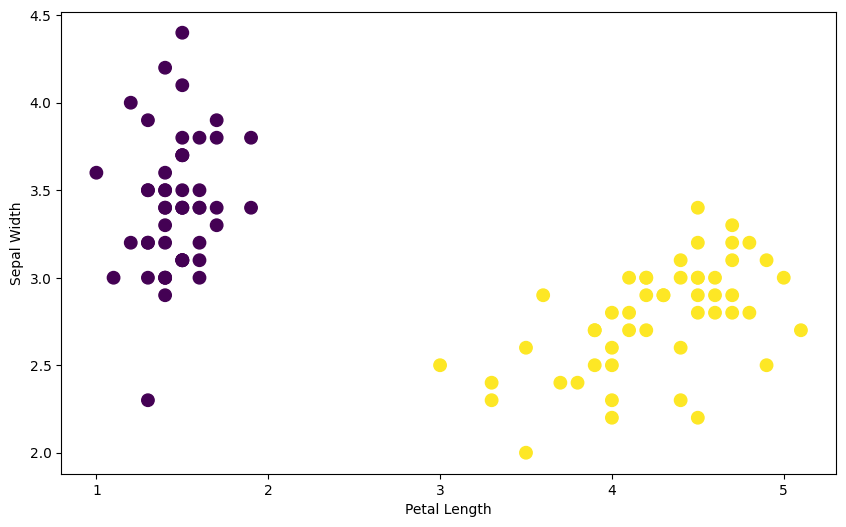

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(data['PetalLengthCm'],data['SepalWidthCm'],s=80,c=data['labels'] )
plt.xlabel("Petal Length")
plt.ylabel("Sepal Width")

In [6]:

data_train,data_test=train_test_split(data,test_size=0.2)

X_train=data_train[['PetalLengthCm','SepalWidthCm']]
Y_train=data_train['labels']

X_test=data_test[['PetalLengthCm','SepalWidthCm']]
Y_test=data_test['labels']

In [7]:
model=LogisticRegression(loss_function=binary_cross_entropy,metric=accuracy,lr=0.001)
model.train(X_train,Y_train,n_iters=5,history_train=True)

Iter:	1	==================================================>	 binary_cross_entropy: 30.470	 accuracy: 87.50% 

Iter:	2	==================================================>	 binary_cross_entropy: 29.404	 accuracy: 93.75% 

Iter:	3	==================================================>	 binary_cross_entropy: 28.554	 accuracy: 97.50% 

Iter:	4	==================================================>	 binary_cross_entropy: 27.870	 accuracy: 97.50% 

Iter:	5	==================================================>	 binary_cross_entropy: 27.315	 accuracy: 97.50% 



In [8]:
history=model.history_train
history

{'iter': [1, 2, 3, 4, 5],
 'loss': [np.float64(30.469995199611443),
  np.float64(29.403507404781905),
  np.float64(28.553825951152078),
  np.float64(27.870069526387113),
  np.float64(27.314752803040257)],
 'precision': [np.float64(0.875),
  np.float64(0.9375),
  np.float64(0.975),
  np.float64(0.975),
  np.float64(0.975)],
 'params': [{'bias': array([0.]),
   'weights': array([ 0.51954095, -0.74033433])},
  {'bias': array([0.00400018]), 'weights': array([ 0.53065644, -0.72788877])},
  {'bias': array([0.00745661]), 'weights': array([ 0.540261  , -0.71713495])},
  {'bias': array([0.01045812]), 'weights': array([ 0.54860145, -0.70779649])},
  {'bias': array([0.01307597]), 'weights': array([ 0.55587579, -0.69965172])},
  {'bias': array([0.01536783]), 'weights': array([ 0.56224431, -0.69252115])}]}

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, clear_output

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))


# Función de actualización para la animación
def update(i):
    ax.clear()  # Limpiar los ejes en cada iteración

    # Actualizar los parámetros del modelo
    model.bias = history['params'][i]['bias']
    model.weights = history['params'][i]['weights']

    # Convertir características a arrays de numpy
    x1 = X_train['PetalLengthCm'].to_numpy()
    x2 = X_train['SepalWidthCm'].to_numpy()

    # Crear una malla para la frontera de decisión
    x1_range = np.linspace(x1.min() - 0.5, x1.max() + 0.5, 100)
    x2_range = np.linspace(x2.min() - 0.5, x2.max() + 0.5, 100)
    x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

    # Predecir la clase para cada punto de la malla
    Z_mesh = model.predict(np.c_[x1_mesh.ravel(), x2_mesh.ravel()]).reshape(x1_mesh.shape)

    # Graficar la frontera de decisión
    ax.contourf(x1_mesh, x2_mesh, Z_mesh, alpha=0.5, cmap='viridis')

    # Graficar los datos originales
    ax.scatter(x1, x2, c=model.predict(X_train), edgecolor='k', s=80)

    ax.set_xlabel('PetalLengthCm')
    ax.set_ylabel('SepalWidthCm')
    
    # Agregar título con información relevante
    if i > 0:
        ax.set_title(f"Iter: {history['iter'][i-1]}, "
                     f"Loss: {history['loss'][i-1]:.2f}, "
                     f"Accuracy: {history['precision'][i-1]:.2f}%")

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(history['params']), repeat=False, interval=1000)

# clear_output(wait=True)

# Cerrar la figura para evitar que se muestre un gráfico adicional
plt.close(fig)

# Mostrar la animación en Jupyter Notebook
HTML(ani.to_jshtml())



In [10]:
model


        model: LogisticRegression 

        bias: [0.01536783] 

        weights: [ 0.56224431 -0.69252115] 

        features_names: ['PetalLengthCm', 'SepalWidthCm'] 

        

In [11]:
model.predict(X_test)

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [12]:
accuracy_test =model.evaluate(X_test,Y_test)
accuracy_test

np.float64(1.0)

Text(0.5, 1.0, 'Logistic Regression on Test Data(Accuracy:1.00%)')

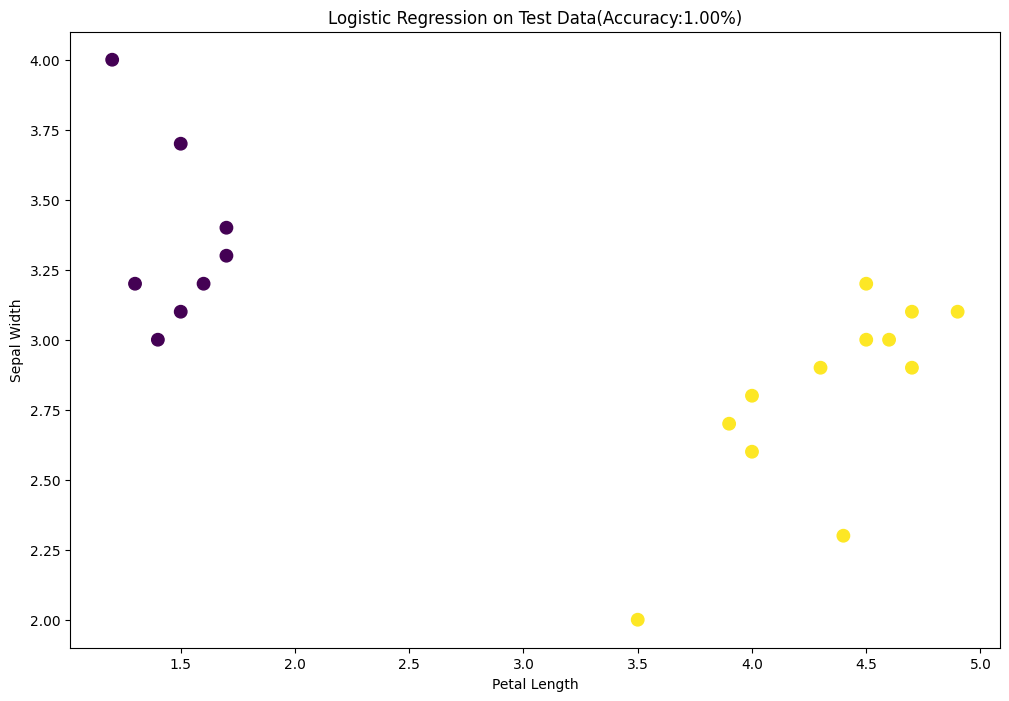

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(X_test['PetalLengthCm'],X_test['SepalWidthCm'],s=80,c=model.predict(X_test))
plt.xlabel("Petal Length")
plt.ylabel("Sepal Width")
plt.title(f'Logistic Regression on Test Data(Accuracy:{accuracy_test:.2f}%)')